# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [149]:
# Import relevant libraries
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup as soup
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [106]:
service = Service(executable_path="C:\chromedriver.exe")
browser = Browser('chrome', service=service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [107]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [108]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [109]:
# Extract all rows of data
table= html_soup.find('table', class_='table')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [110]:
# Create an empty list
mars_temp_data = []

# Loop through the scraped data to create a list of rows

for row in table.find_all('tr'):
    # Skip the header row
    if row.th:
        continue
        
    # Create a dictionary for the row
    row_data = {}
    row_data['id'] = row.find_all('td')[0].text.strip()
    row_data['terrestrial_date'] = row.find_all('td')[1].text.strip()
    row_data['sol'] = row.find_all('td')[2].text.strip()
    row_data['ls'] = row.find_all('td')[3].text.strip()
    row_data['month'] = row.find_all('td')[4].text.strip()
    row_data['min_temp'] = row.find_all('td')[5].text.strip()
    row_data['pressure'] = row.find_all('td')[6].text.strip()
    
    # Append the dictionary to the list
    mars_temp_data.append(row_data)


In [127]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(mars_temp_data, columns=column_names)

In [128]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [129]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [114]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df.terrestrial_date = pd.to_datetime(df.terrestrial_date, yearfirst=True)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [115]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [116]:
# 1. How many months are there on Mars?
months = df["month"].nunique()

print (months)

12


In [117]:
# 2. How many Martian days' worth of data are there?
num_martian_days = df["sol"].max() - df["sol"].min() + 1

print(num_martian_days)

1968


In [118]:
# 3. What is the average low temperature by month?
avg_temps_by_month = df.groupby("month")["min_temp"].mean()

print("Average low temperature by month:")
print(avg_temps_by_month)

Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


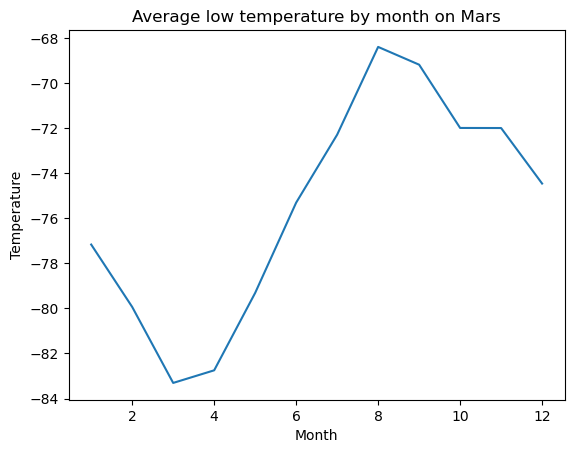

In [119]:
# Plot the average temperature by month
avg_temps_by_month.plot(kind="line", x="month", y="min_temp")
plt.title("Average low temperature by month on Mars")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

In [120]:
# Identify the coldest and hottest months in Curiosity's location, based on the min and max temperature reached

temp_by_month = df.groupby("month")["min_temp"].agg(["min", "max"])

coldest_month = temp_by_month.sort_values("min").head(1).index[0]
hottest_month = temp_by_month.sort_values("max", ascending=False).head(1).index[0]

print("Coldest month on Mars:", coldest_month)
print("Hottest month on Mars:", hottest_month)

Coldest month on Mars: 3
Hottest month on Mars: 1


In [121]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby("month")["pressure"].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

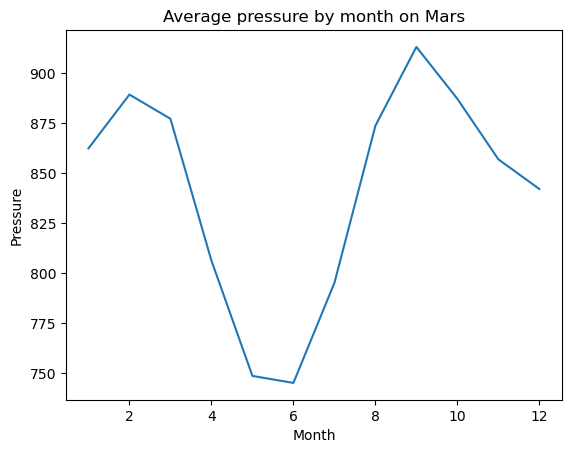

In [122]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind="line", x="month", y="pressure")
plt.title("Average pressure by month on Mars")
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.show()

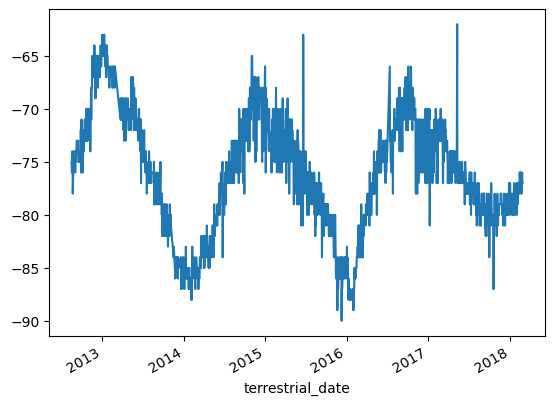

In [123]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Set the 'terrestrial_date' column as the dataframe index
df.set_index('terrestrial_date', inplace=True)

# Plot the daily minimum temperature
df['min_temp'].plot()

# Show the plot
plt.show()

In [154]:
# Filter the rows for the year 2013 and find max temperature
df_2013 = df[(df['terrestrial_date'] >= '2013-01-01') & (df['terrestrial_date'] <= '2013-12-31')]

max_temp_2013 = df_2013['min_temp'].max()
max_temp_row_2013 = df_2013.loc[df_2013['min_temp'] == max_temp_2013]
max_temp_date_2013 = max_temp_row_2013['terrestrial_date'].values[0]
max_temp_date_2013 = pd.to_datetime(max_temp_date_2013)

# Filter the rows for the year 2015 and find max temperature
df_2015 = df[(df['terrestrial_date'] >= '2015-01-01') & (df['terrestrial_date'] <= '2015-12-31')]

max_temp_2015 = df_2015['min_temp'].max()
max_temp_row_2015 = df_2015.loc[df_2015['min_temp'] == max_temp_2015]
max_temp_date_2015 = max_temp_row_2015['terrestrial_date'].values[0]
max_temp_date_2015 = pd.to_datetime(max_temp_date_2015)

# Filter the rows for the year 2017 and find max temperature
df_2017 = df[(df['terrestrial_date'] >= '2017-01-01') & (df['terrestrial_date'] <= '2017-12-31')]

max_temp_2017 = df_2017['min_temp'].max()
max_temp_row_2017 = df_2017.loc[df_2017['min_temp'] == max_temp_2017]
max_temp_date_2017 = max_temp_row_2017['terrestrial_date'].values[0]
max_temp_date_2017 = pd.to_datetime(max_temp_date_2017)


# Calculate time difference
days_diff_2015_v_2013 = (max_temp_date_2015 - max_temp_date_2013).days
days_diff_2017_v_2015 = (max_temp_date_2017 - max_temp_date_2015).days

# Print results
print("Peak temperature in 2013 was on", max_temp_date_2013.strftime("%Y-%m-%d"), "terrestrial date")
print("Peak temperature in 2015 was on", max_temp_date_2015.strftime("%Y-%m-%d"), "terrestrial date")
print("Peak temperature in 2017 was on", max_temp_date_2017.strftime("%Y-%m-%d"), "terrestrial date")

print("Days between peak temperatures in 2015 vs 2013:", days_diff_2015_v_2013, "and in 2017 vs 2015:", days_diff_2017_v_2015)

avg_days_diff = np.mean([days_diff_2015_v_2013, days_diff_2017_v_2015])

print("The average distance from peak to peak is", avg_days_diff, "days")


Peak temperature in 2013 was on 2013-12-20 terrestrial date
Peak temperature in 2015 was on 2015-12-09 terrestrial date
Peak temperature in 2017 was on 2017-10-20 terrestrial date
Days between peak temperatures in 2015 vs 2013: 719 and in 2017 vs 2015: 681
The average distance from peak to peak is 700.0 days


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [155]:
# Write the data to a CSV
df.to_csv('output.csv', index=False)


In [ ]:
browser.quit()